In [102]:
from librerias import *

In [103]:
btc_dia = pd.read_csv ('Data/btc_dia.csv')

btc_dia.set_index('Date', inplace=True)

btc_dia.index = pd.to_datetime(btc_dia.index)

btc_dia = btc_dia.loc['2017-01-01':]

btc_diak = btc_dia.copy ()

In [104]:
btc_dia ['retornos']= btc_dia ['Open'].pct_change ().round (3)
btc_diak = btc_dia.copy ()
btc_dia

,Price,Open,High,Low,Vol_BTC,Vol_USD,retornos
Date,,,,,,,
2024-03-18,67594,68389,68920,66601,78070.0,"5,277,063,580",NaN
2024-03-17,68391,65314,68857,64605,66070.0,"4,518,593,370",-0.045
2024-03-16,65314,69456,70037,64971,75820.0,"4,952,107,480",0.063
2024-03-15,69463,71387,72398,65765,148590.0,"10,321,507,170",0.028
2024-03-14,71387,73066,73740,68717,109430.0,"7,811,879,410",0.024
...,...,...,...,...,...,...,...
2017-01-05,989,1135,1150,874,240010.0,"237,369,890",0.148
2017-01-04,1135,1033,1148,1022,156270.0,"177,366,450",-0.090
2017-01-03,1033,1017,1035,1006,54790.0,"56,598,070",-0.015


In [105]:
retornos_anualizado= btc_dia ['retornos'].mean () * 365
retornos_anualizado

-0.3089954424610709

In [106]:
riesgo_anual = btc_dia ['retornos'].std () * np.sqrt (365)
riesgo_anual

0.7642508261613332

In [107]:
btc_diak = pd.DataFrame (btc_diak ['Price'])





In [108]:
btc_diak = btc_diak.sort_index()

dsr = btc_diak ['Price'].pct_change (1)*100

btc_diak ['DRS'] = dsr

btc_diak = btc_diak [1:]

btc_diak

,Price,DRS
Date,,
2017-01-02,1017,2.211055
2017-01-03,1033,1.573255
2017-01-04,1135,9.874153
2017-01-05,989,-12.863436
2017-01-06,886,-10.414560
...,...,...
2024-03-14,71387,-2.297922
2024-03-15,69463,-2.695169
2024-03-16,65314,-5.972964


In [109]:
# Agregar una constante para hacer todos los valores positivos
constante = 1  # Puedes ajustar este valor según tus necesidades
btc_diak['log_retornos'] = np.log(btc_diak['DRS'] + constante)



btc_diak

c:\Users\pobla\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



,Price,DRS,log_retornos
Date,,,
2017-01-02,1017,2.211055,1.166600
2017-01-03,1033,1.573255,0.945172
2017-01-04,1135,9.874153,2.386389
2017-01-05,989,-12.863436,NaN
2017-01-06,886,-10.414560,NaN
...,...,...,...
2024-03-14,71387,-2.297922,NaN
2024-03-15,69463,-2.695169,NaN
2024-03-16,65314,-5.972964,NaN


In [110]:
retornos_log = btc_diak ['log_retornos']

retornos_log



Date
2017-01-02    1.166600
2017-01-03    0.945172
2017-01-04    2.386389
2017-01-05         NaN
2017-01-06         NaN
                ...   
2024-03-14         NaN
2024-03-15         NaN
2024-03-16         NaN
2024-03-17    1.742410
2024-03-18         NaN
Name: log_retornos, Length: 2633, dtype: float64

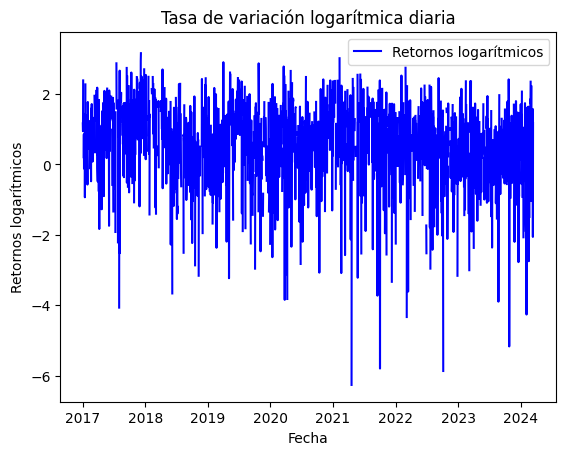

In [111]:

# Graficar los retornos logarítmicos
plt.plot(retornos_log.index, retornos_log.values, label='Retornos logarítmicos', color='blue')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Retornos logarítmicos')
plt.title('Tasa de variación logarítmica diaria')
plt.legend()

# Mostrar el gráfico
plt.show()


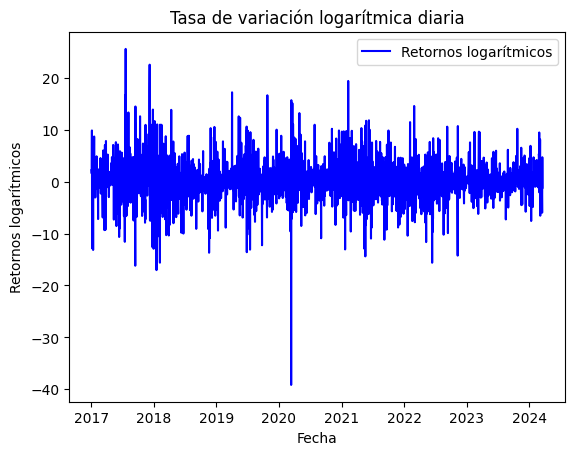

In [112]:
# Graficar los retornos logarítmicos
plt.plot(btc_diak.index, btc_diak.DRS, label='Retornos logarítmicos', color='blue')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Retornos logarítmicos')
plt.title('Tasa de variación logarítmica diaria')
plt.legend()

# Mostrar el gráfico
plt.show()
